### METAHEURISTICS EXAM DSTI A19
#### Jean MILPIED
#### date: May 26

### F5: Shifted Griewank’s Function 

The shifted Griewank's function is:  
sum for i = 1 to D of ((z[i])^2 / 4000) - product for i=1 to D of cos(z[i] / sqrt(i)) + 1 + bias, where z=x-O, x of D dimension and where O is the shift of dimension D  
x belongs [-600,600] f_bias= -180

In [1]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import uniform
import math
import time
from scipy.optimize import rosen, differential_evolution

In [8]:
#objective function
def objective_F5(my_x):
    my_z=my_x-my_shift
    my_z_square=np.square(my_z)
    my_z_costerm=[np.cos(my_z[i]/np.sqrt(i+1)) for i in range(my_z.size)]
    my_J=sum(my_z_square)/4000-np.prod(my_z_costerm)+1-180 #bias is -180
    return my_J

In [9]:
#initialize function
def initialize_my_X (D,range_min, range_max):
    my_X_init=np.random.uniform(low=range_min, high=range_max, size=D)
    return my_X_init

In [10]:
global my_obj #we create a global variable to consolidate the evolution of the objective function
#call-back function for the optimizer
def costF(Xi,convergence):
    my_X=Xi
    my_obj.append(objective_F5(Xi))

In [11]:
my_obj=[]

def problem(my_size, my_func,my_bound_min,my_bound_max):
    global my_shift
    #my_X0_2=initialize_my_X(my_size,my_bound_min,my_bound_max)
    my_bounds=[(my_bound_min,my_bound_max) for i in range(my_size)]
    print(my_bounds)
    my_shift=initialize_my_X(my_size,my_bound_min,my_bound_max) #we initialize the shift at random (this can be changed)
    t1=time.time()
    res = differential_evolution(my_func, my_bounds,disp=True, mutation=(0.02,1),recombination=0.9, tol=0.0001,popsize=30,updating='immediate',callback=costF)
    t2=time.time()
    plt.plot(my_obj)
    print(t2-t1)
    print("my_shift is: \n",my_shift)
    
    print("\n",res)
    

[(-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600), (-600, 600)]
differential_evolution step 1: f(x)= 358.868
differential_evolution step 2: f(x)= 88.0582
differential_evolution step 3: f(x)= -63.8967
differential_evolution step 4: f(x)= -75.0589
differential_evolution step 5: f(x)= -119.686
differential_evolution step 6: f(x)= -161.017
differential_evolution step 7: f(x)= -161.017
differential_evolution step 8

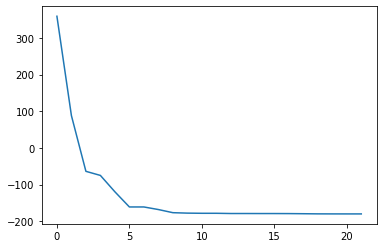

In [12]:
problem(50,objective_F5,-600,600)